In [1]:
pip install opendatasets

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.1 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/10.1 MB 3.7 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/10.1 MB 3.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/10.1 MB 3.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/10.1 MB 3.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.5/10.1 MB 3.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.2/10.1 MB 3.7 MB/s eta 0:00:02
   ----------------------- ---------------- 6.0/10.1 MB 3.7 MB/s eta 0:00:02
   -------------------------- ------------- 6.8/10.1 MB 3.7 MB/s eta 0:00:01
   -------------


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [7]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [8]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [9]:
train_data.head(5)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [10]:
test_data.head(5)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [12]:
#some columns contain a lot of missing values, they will be dropped
#others contain less and they will be imputer using mean imputation 

In [15]:
train_data_before_dropping = train_data.copy()
train_data_before_dropping

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [27]:
columns_to_drop = []
for i in train_data.columns:
    if train_data[i].notnull().sum() == 439:
        columns_to_drop.append(i)
train_data = train_data.drop(columns = columns_to_drop)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 69 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [33]:
columns_for_imputation = []
for i in train_data.columns:
    if train_data[i].isnull().sum() > 0:
        columns_for_imputation.append(i)
columns_for_imputation

['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 '

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imputer = SimpleImputer(strategy='mean')
train_data_before_imputation = train_data.copy()
train_data_before_imputation

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [62]:
train_data_after_imputation = train_data_before_imputation.copy()
train_data_after_imputation[columns_for_imputation] = imputer.fit_transform(train_data_before_imputation[columns_for_imputation])

In [63]:
train_data_after_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 69 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64
 8   SulphurDioxide_c

In [38]:
#let's see if there is a duplicate in the dataset

In [64]:
duplicates = train_data_after_imputation['ID_LAT_LON_YEAR_WEEK'].duplicated().sum()
print(duplicates)

0


In [65]:
train_data_after_imputation.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,...,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000246,0.167371,0.000186,0.064430,58.019802,12.775199,...,1424.121581,9023.402405,1355.082566,13.505496,0.049282,30.281299,6.408500,37.721217,4.390328,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000065,0.730940,-0.000053,0.123332,-41.806629,31.209518,...,4603.362733,53218.992678,3688.139591,10.008471,0.241699,-30.276399,35.850589,-125.822386,24.713837,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5584.422966,59403.443128,4630.746804,15.205027,0.272412,-12.653263,41.073490,-85.397329,28.289776,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000117,0.905362,0.000093,0.199492,30.969258,44.906770,...,6534.822189,65612.718663,5566.268062,23.708138,0.302675,9.250658,44.423683,-48.283981,31.481630,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [49]:
#data has to be scaled
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [66]:
identifier = train_data_after_imputation['ID_LAT_LON_YEAR_WEEK']
identifier

0        ID_-0.510_29.290_2019_00
1        ID_-0.510_29.290_2019_01
2        ID_-0.510_29.290_2019_02
3        ID_-0.510_29.290_2019_03
4        ID_-0.510_29.290_2019_04
                   ...           
79018    ID_-3.299_30.301_2021_48
79019    ID_-3.299_30.301_2021_49
79020    ID_-3.299_30.301_2021_50
79021    ID_-3.299_30.301_2021_51
79022    ID_-3.299_30.301_2021_52
Name: ID_LAT_LON_YEAR_WEEK, Length: 79023, dtype: object

In [69]:
train_data_after_imputation_copy = train_data_after_imputation.copy()
train_data_after_imputation_copy

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,0.000048,0.834848,0.000035,0.158418,-7.925870,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [73]:
label = train_data_after_imputation['emission']

In [74]:
features = train_data_after_imputation.drop(columns = ['ID_LAT_LON_YEAR_WEEK', 'emission'])

In [75]:
label

0         3.750994
1         4.025176
2         4.231381
3         4.305286
4         4.347317
           ...    
79018    29.404171
79019    29.186497
79020    29.131205
79021    28.125792
79022    27.239302
Name: emission, Length: 79023, dtype: float64

In [76]:
features

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
3,-0.510,29.290,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,54703.511452,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,53983.493958,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469
79020,-3.299,30.301,2021,50,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,49904.738442,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,41395.313100,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868


In [77]:
scaled_features = scaler.fit_transform(features)

In [78]:
label_array = np.array(label)

In [79]:
(features_train, features_test, label_train, label_test) = train_test_split(scaled_features, label_array, test_size=0.7, shuffle=True)

In [80]:
model = LinearRegression()
model.fit(features_train, label_train)
model.score(features_test, label_test)

0.026707735250590448

In [83]:
predicted = model.predict(features_test)

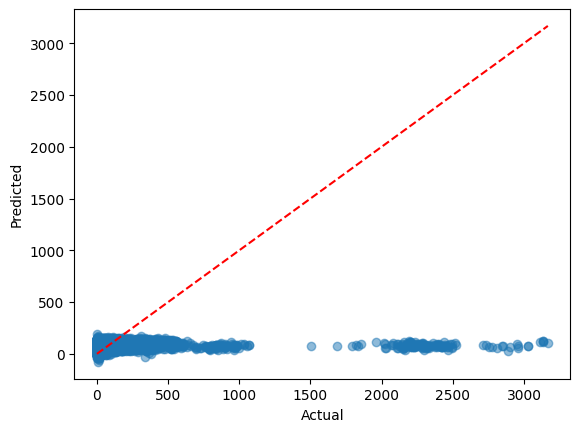

In [86]:
plt.scatter(label_test, predicted, alpha=0.5)
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error
lrmse = np.sqrt(mean_squared_error(label_test, predicted))
print(lrmse)

143.14073966559965


In [88]:
svr_model = SVR(kernel = 'rbf')
svr_model.fit(features_train, label_train)
svr_model.score(features_test, label_test)

-0.03428425560917536

In [97]:
tree_model = DecisionTreeRegressor()
tree_model.fit(features_train, label_train)
tree_model.score(features_test, label_test)

0.9251866527619069

In [98]:
label_predicted = tree_model.predict(features_test)

In [99]:
tree_model_error = np.sqrt(mean_squared_error(label_test, label_predicted))

In [100]:
print(tree_model_error)

39.685436745441905


In [101]:
test_data

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [102]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

In [103]:
test_data = test_data.drop(columns = columns_to_drop)

In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

In [105]:
test_data[columns_for_imputation] = imputer.fit_transform(test_data[columns_for_imputation])

In [106]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  24353 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              24353 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            24353 non-null  float64
 8   SulphurDioxide_c

In [107]:
test_identifier = test_data['ID_LAT_LON_YEAR_WEEK']
test_data = test_data.drop(columns = ['ID_LAT_LON_YEAR_WEEK'])

In [108]:
test_identifier

0        ID_-0.510_29.290_2022_00
1        ID_-0.510_29.290_2022_01
2        ID_-0.510_29.290_2022_02
3        ID_-0.510_29.290_2022_03
4        ID_-0.510_29.290_2022_04
                   ...           
24348    ID_-3.299_30.301_2022_44
24349    ID_-3.299_30.301_2022_45
24350    ID_-3.299_30.301_2022_46
24351    ID_-3.299_30.301_2022_47
24352    ID_-3.299_30.301_2022_48
Name: ID_LAT_LON_YEAR_WEEK, Length: 24353, dtype: object

In [109]:
test_data

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.510,29.290,2022,0,0.000014,0.792570,0.000009,0.139218,9.298052,36.174307,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,-3.299,30.301,2022,45,0.000014,0.792570,0.000009,0.139218,9.298052,36.174307,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,-3.299,30.301,2022,46,0.000014,0.792570,0.000009,0.139218,9.298052,36.174307,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,38.215228,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [110]:
testing_features = scaler.fit_transform(test_data)

In [111]:
testing_features

array([[1.        , 0.32142857, 0.        , ..., 0.51612234, 0.12161156,
        0.76337997],
       [1.        , 0.32142857, 0.        , ..., 0.65018338, 0.07731407,
        0.65408468],
       [1.        , 0.32142857, 0.        , ..., 0.70460345, 0.02852051,
        0.48547269],
       ...,
       [0.        , 0.62742131, 0.        , ..., 0.5088755 , 0.18916016,
        0.62150358],
       [0.        , 0.62742131, 0.        , ..., 0.70382019, 0.15365922,
        0.63098209],
       [0.        , 0.62742131, 0.        , ..., 0.46966225, 0.18626662,
        0.79016414]], shape=(24353, 67))

In [113]:
predicted_values = tree_model.predict(testing_features)

In [114]:
df = pd.DataFrame(predicted_values, columns=['emission'])

In [115]:
df

,emission
0,3.041866
1,3.753601
2,3.802669
3,3.802669
4,3.041866
...,...
24348,29.384690
24349,26.892382
24350,27.507738
24351,29.384690


In [119]:
submission_file = pd.DataFrame({
    'ID_LAT_LON_YEAR_WEEK': test_identifier,
    'emission': predicted_values
})

In [120]:
submission_file

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.041866
1,ID_-0.510_29.290_2022_01,3.753601
2,ID_-0.510_29.290_2022_02,3.802669
3,ID_-0.510_29.290_2022_03,3.802669
4,ID_-0.510_29.290_2022_04,3.041866
...,...,...
24348,ID_-3.299_30.301_2022_44,29.384690
24349,ID_-3.299_30.301_2022_45,26.892382
24350,ID_-3.299_30.301_2022_46,27.507738
24351,ID_-3.299_30.301_2022_47,29.384690


In [121]:
submission_file.to_csv('my_submission_file', index=False)

In [122]:
from IPython.display import FileLink